In [0]:
from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile
drive.mount('/content/drive',force_remount= True)
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
download = drive.CreateFile({'id':'1wl_Pjd0U-XImkp1RCbewrNSwXSFdynjG'})
download.GetContentFile('300dm.zip')
with zipfile.ZipFile('300dm.zip','r') as zip_ref:
  zip_ref.extractall()

In [0]:
!pip install git+https://github.com/samoturk/mol2vec

In [0]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
from rdkit.Chem import Descriptors
from rdkit import DataStructs
from rdkit.Chem import MACCSkeys
from rdkit.Chem.AtomPairs import Pairs
from sklearn.model_selection import train_test_split
from rdkit.Chem import Descriptors
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from mlxtend.plotting import plot_linear_regression

In [0]:
df = pd.read_csv('/content/data/22bba507-efcf-4af0-b9d0-f26193605457_train.csv')
df['mol'] = df['SMILES sequence'].apply(lambda x: Chem.MolFromSmiles(x)) 
df['mol'] = df['mol'].apply(lambda x: Chem.AddHs(x))
df['num_of_atoms'] = df['mol'].apply(lambda x: x.GetNumAtoms())
df['Num_of_bonds'] = df['mol'].apply(lambda x:x.GetNumBonds())
df['num_of_heavy_atoms'] = df['mol'].apply(lambda x: x.GetNumHeavyAtoms())

In [0]:
def number_of_atoms(atom_list, df):
    for i in atom_list:
        df['num_of_{}_atoms'.format(i)] = df['mol'].apply(lambda x: len(x.GetSubstructMatches(Chem.MolFromSmiles(i))))
number_of_atoms(['C','O','N','S'], df)

In [0]:
df['descriptor'] = df['mol'].apply(lambda x: Descriptors.MolLogP(x))
df['ssr'] = df['mol'].apply(lambda x: Chem.GetSSSR(x))
df['tpsa'] = df['mol'].apply(lambda x: Descriptors.TPSA(x))
df['mol_exact_w'] = df['mol'].apply(lambda x: Descriptors.ExactMolWt(x))
df['num_valence_electrons'] = df['mol'].apply(lambda x: Descriptors.NumValenceElectrons(x))
df['num_heteroatoms'] = df['mol'].apply(lambda x: Descriptors.NumHeteroatoms(x))
df['rotatable_bond'] = df['mol'].apply(lambda x: Descriptors.NumRotatableBonds(x))
df['mol_mr'] = df['mol'].apply(lambda x: Descriptors.MolMR(x)) 
df['mol_w'] = df['mol'].apply(lambda x: Descriptors.MolWt(x))
#df['NumAliphaticCarbocycles'] = df['mol'].apply(lambda x: Descriptors.NumAliphaticCarbocycles(x))
#df['NumAliphaticHeterocycles'] = df['mol'].apply(lambda x: Descriptors.NumAliphaticHeterocycles(x))
#df['NumAliphaticRings'] = df['mol'].apply(lambda x: Descriptors.NumAliphaticRings(x))
df['NumAromaticCarbocycles'] = df['mol'].apply(lambda x: Descriptors.NumAromaticCarbocycles(x))
df['NumAromaticHeterocycles'] = df['mol'].apply(lambda x: Descriptors.NumAromaticHeterocycles(x))
df['NumAromaticRings'] = df['mol'].apply(lambda x: Descriptors.NumAromaticRings(x))
df['NumHAcceptors'] = df['mol'].apply(lambda x: Descriptors.NumHAcceptors(x))
df['NumHDonors'] = df['mol'].apply(lambda x: Descriptors.NumHDonors(x))
#df['NumRadicalElectrons'] = df['mol'].apply(lambda x: Descriptors.NumRadicalElectrons(x))
#df['NumSaturatedCarbocycles'] = df['mol'].apply(lambda x: Descriptors.NumSaturatedCarbocycles(x))
#df['NumSaturatedHeterocycles'] = df['mol'].apply(lambda x: Descriptors.NumSaturatedHeterocycles(x))
df['NumSaturatedRings'] = df['mol'].apply(lambda x: Descriptors.NumSaturatedRings(x))
df['NHOHCount'] = df['mol'].apply(lambda x: Descriptors.NHOHCount(x))
df['NOCount'] = df['mol'].apply(lambda x: Descriptors.NOCount(x))
df['HeavyAtomMolWt'] = df['mol'].apply(lambda x: Descriptors.HeavyAtomMolWt(x))
df['FpDensityMorgan1'] = df['mol'].apply(lambda x: Descriptors.FpDensityMorgan1(x))
df['FpDensityMorgan2'] = df['mol'].apply(lambda x: Descriptors.FpDensityMorgan2(x))
df['FpDensityMorgan3'] = df['mol'].apply(lambda x: Descriptors.FpDensityMorgan3(x))
df['fr_NH1'] = df['mol'].apply(lambda x: Descriptors.fr_NH1(x))
df['fr_NH2'] = df['mol'].apply(lambda x: Descriptors.fr_NH2(x))
df['fr_NH0'] = df['mol'].apply(lambda x: Descriptors.fr_NH0(x))
df['fr_Al_COO'] = df['mol'].apply(lambda x: Descriptors.fr_Al_COO(x))



In [0]:
df['fr_bicyclic'] = df['mol'].apply(lambda x: Descriptors.fr_bicyclic(x))
df['MaxPartialCharge'] = df['mol'].apply(lambda x: Descriptors.MaxPartialCharge(x))
df['HallKierAlpha'] = df['mol'].apply(lambda x: Descriptors.HallKierAlpha(x))
df['RingCount'] = df['mol'].apply(lambda x: Descriptors.RingCount(x))
df['BalabanJ'] = df['mol'].apply(lambda x: Descriptors.BalabanJ(x))


# Descriptors.i

In [0]:
X = df.drop(columns=['SMILES sequence', 'mol', 'Binding Affinity'])
y = df['Binding Affinity'].values
x_t,x_te,y_t,y_te = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
x_train = np.array(x_t)
x_test = np.array(x_te)
y_train = np.array(y_t)
y_test = np.array(y_te)

In [87]:
svr = SVR(kernel = 'rbf',C =50,gamma='scale')
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rms = sqrt(mse)
print(mse)
print(rms)
mae = mean_absolute_error(y_test,y_pred)
print(mae)
r2score = r2_score(y_test,y_pred)
print(r2score)

7.365813296613748
2.714003186551878
2.020515548896202
0.461816996984431


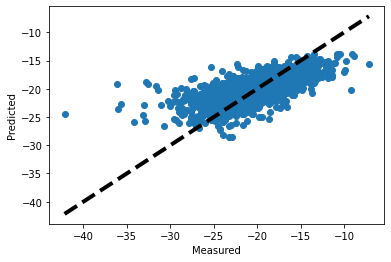

In [88]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

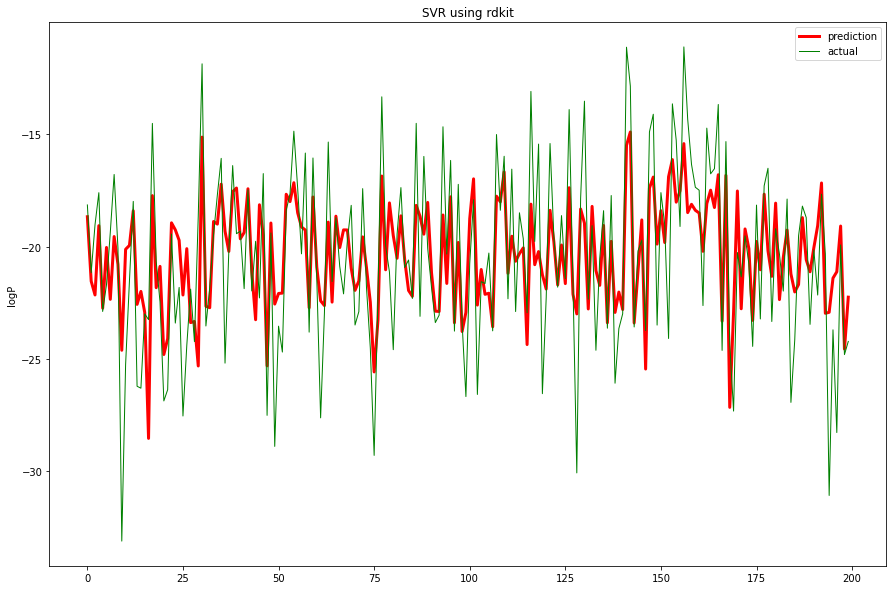

In [89]:
plt.figure(figsize=(15, 10))
plt.plot(y_pred[:200], "red", label="prediction", linewidth=3.0)
plt.plot(y_test[:200], 'green', label="actual", linewidth=1.0)
plt.legend()
plt.ylabel('logP')
plt.title("SVR using rdkit")
plt.show()

In [120]:
svr = SVR(kernel = 'poly',C =50,gamma='scale')
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rms = sqrt(mse)
print(mse)
print(rms)
mae = mean_absolute_error(y_test,y_pred)
print(mae)
r2score = r2_score(y_test,y_pred)
print(r2score)

7.063890846790329
2.657798120021596
1.9780328709433654
0.4838769548167162


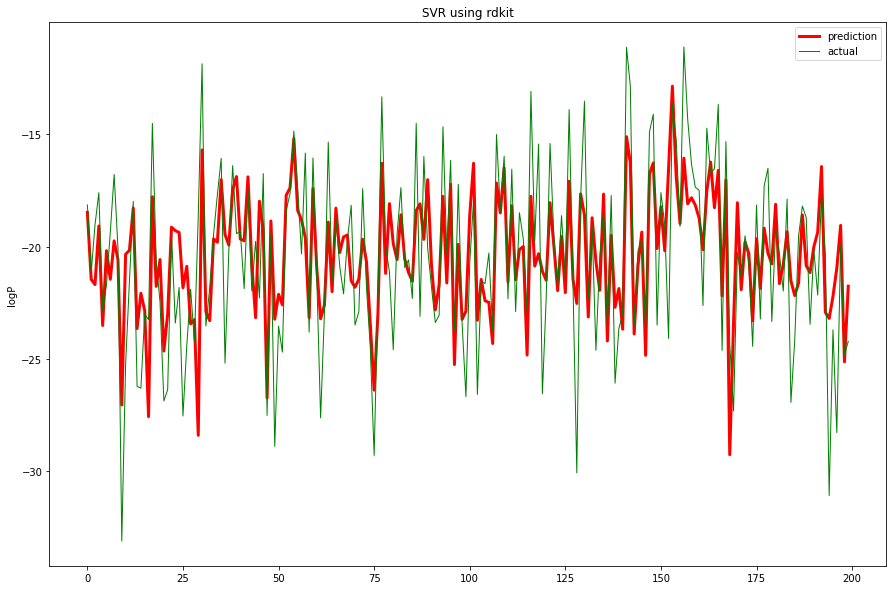

In [121]:
plt.figure(figsize=(15, 10))
plt.plot(y_pred[:200], "red", label="prediction", linewidth=3.0)
plt.plot(y_test[:200], 'green', label="actual", linewidth=1.0)
plt.legend()
plt.ylabel('logP')
plt.title("SVR using rdkit")
plt.show()

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error

reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
rms = sqrt(mse)
print(mse)
print(rms)
mae = mean_absolute_error(y_test,y_pred)
print(mae)

6.686143370985507
2.585757794339119
1.9188634942709082


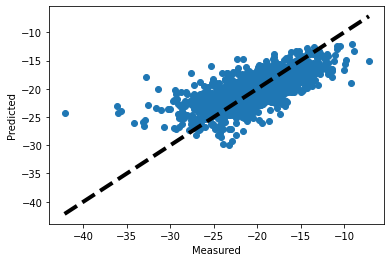

In [91]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

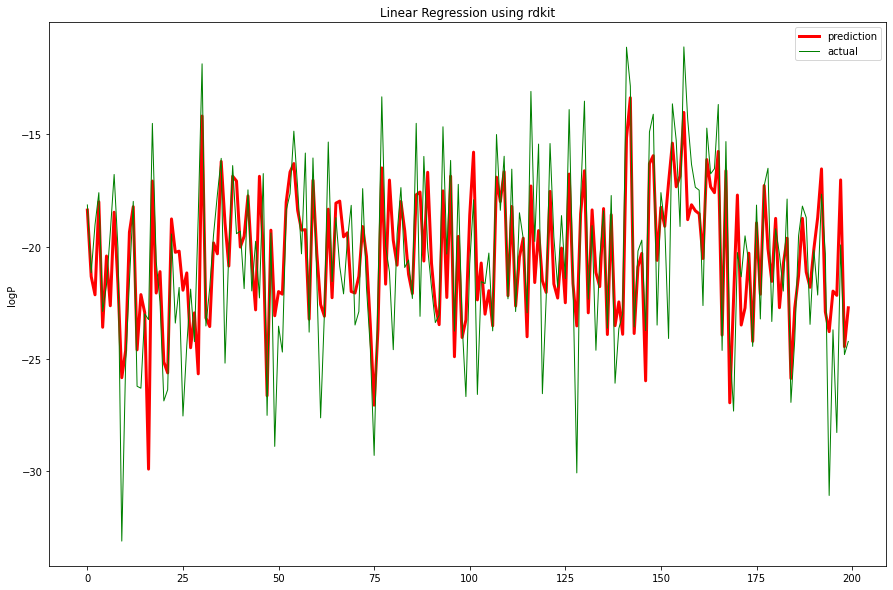

In [92]:
plt.figure(figsize=(15, 10))
plt.plot(y_pred[:200], "red", label="prediction", linewidth=3.0)
plt.plot(y_test[:200], 'green', label="actual", linewidth=1.0)
plt.legend()
plt.ylabel('logP')
plt.title("Linear Regression using rdkit")
plt.show()

In [0]:
from sklearn.ensemble import RandomForestRegressor
classifier = RandomForestRegressor(n_estimators=2000, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rms = sqrt(mse)
print(mse)
print(rms)
mae = mean_absolute_error(y_test,y_pred)
print(mae)

2.646251971567607
2.0163660527079084


In [93]:
from sklearn.tree import DecisionTreeRegressor
classifier = DecisionTreeRegressor(random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)
mae = mean_absolute_error(y_test,y_pred)
print(mae)

3.4425048712956015
2.4891097833333333


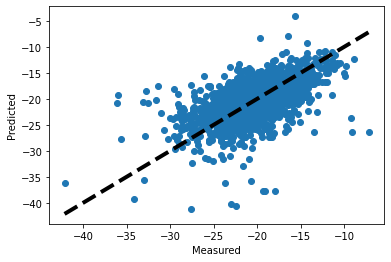

In [94]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

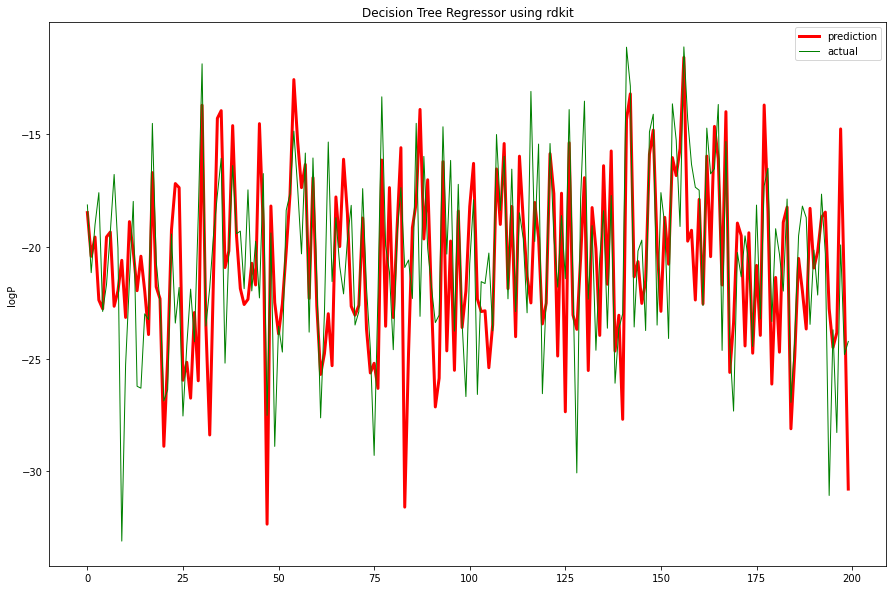

In [95]:
plt.figure(figsize=(15, 10))
plt.plot(y_pred[:200], "red", label="prediction", linewidth=3.0)
plt.plot(y_test[:200], 'green', label="actual", linewidth=1.0)
plt.legend()
plt.ylabel('logP')
plt.title("Decision Tree Regressor using rdkit")
plt.show()

In [96]:
from sklearn.neighbors import KNeighborsRegressor
classifier = KNeighborsRegressor()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)
mae = mean_absolute_error(y_test,y_pred)
print(mae)

2.9958244538037317
2.2513186055555554


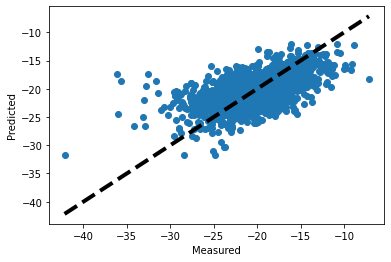

In [97]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

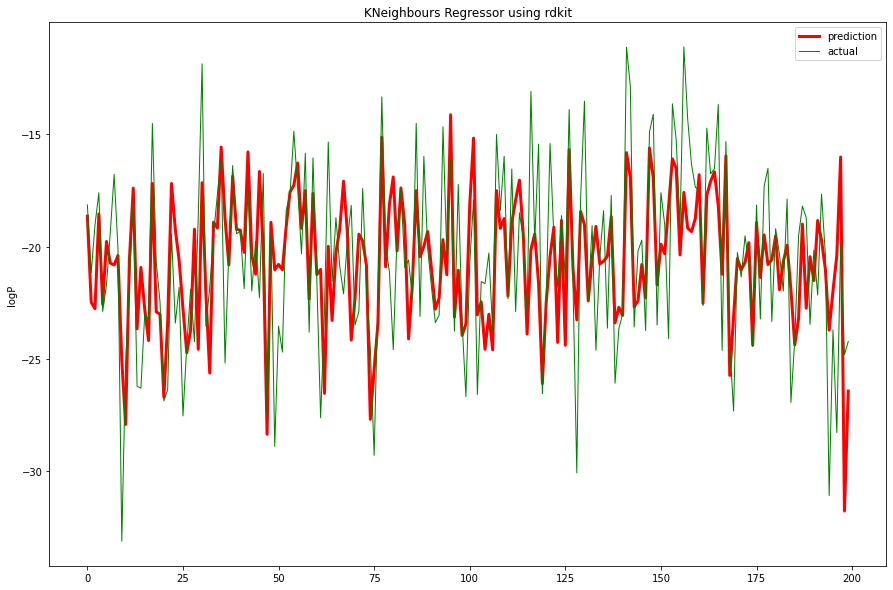

In [98]:
plt.figure(figsize=(15, 10))
plt.plot(y_pred[:200], "red", label="prediction", linewidth=3.0)
plt.plot(y_test[:200], 'green', label="actual", linewidth=1.0)
plt.legend()
plt.ylabel('logP')
plt.title("KNeighbours Regressor using rdkit")
plt.show()

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
classifier = GradientBoostingRegressor(n_estimators = 1000, max_depth = 5, min_samples_split= 2, learning_rate = 0.01, loss = 'ls')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rms = sqrt(mse)
print(mse)
print(rms)
mae = mean_absolute_error(y_test,y_pred)
print(mae)

6.236451960549322
2.4972889221212116
1.8609757556289606


In [0]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

**Word to Vec**

In [99]:
from gensim.models import word2vec
from mol2vec.features import mol2alt_sentence, MolSentence, DfVec, sentences2vec
model = word2vec.Word2Vec.load('/content/300dm/model_300dim.pkl')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
mdf = pd.read_csv('/content/data/22bba507-efcf-4af0-b9d0-f26193605457_train.csv')
#X = df.drop(columns=['SMILES sequence', 'mol', 'Binding Affinity'])
target = mdf['Binding Affinity']
mdf.drop(columns='Binding Affinity',inplace=True)
mdf['mol'] = mdf['SMILES sequence'].apply(lambda x: Chem.MolFromSmiles(x))
mdf['sentence'] = mdf.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)
mdf['mol2vec'] = [DfVec(x) for x in sentences2vec(mdf['sentence'], model, unseen='UNK')]
X = np.array([x.vec for x in mdf['mol2vec']])
y = target.values
mx_train, mx_test, my_train, my_test = train_test_split(X, y, test_size=.2, random_state=1)

In [104]:
from sklearn.linear_model import LinearRegression
mreg = LinearRegression().fit(mx_train, my_train)
y_pred = mreg.predict(mx_test)
mse = mean_squared_error(my_test, y_pred)
rms = sqrt(mse)
print(rms)
mae = mean_absolute_error(my_test,y_pred)
print(mae)

2.4541342918568545
1.7645788399556477


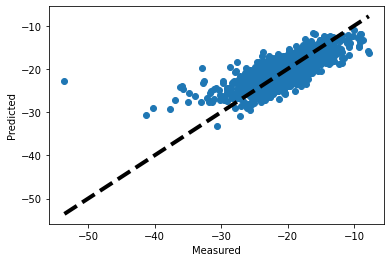

In [102]:
fig, ax = plt.subplots()
ax.scatter(my_test, y_pred)
ax.plot([my_test.min(), my_test.max()], [my_test.min(), my_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

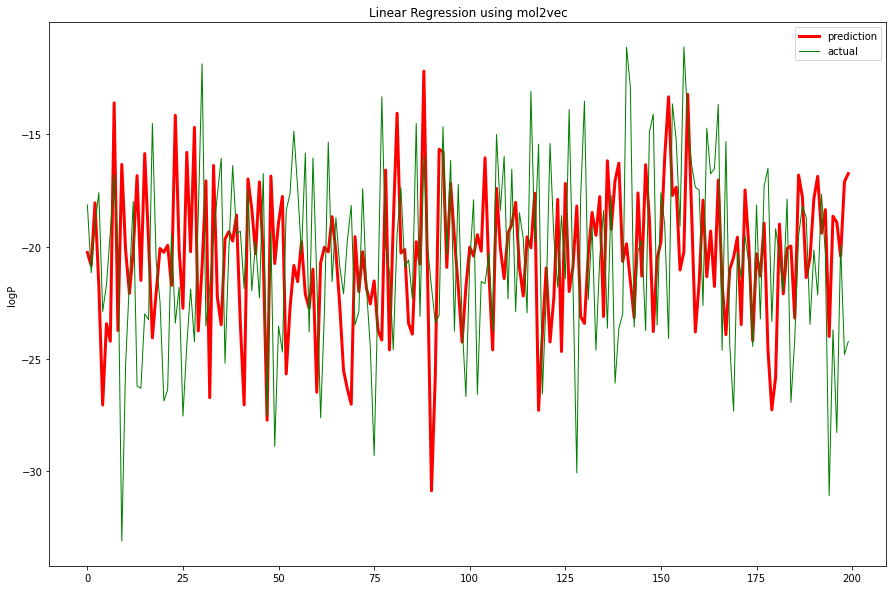

In [103]:
plt.figure(figsize=(15, 10))
plt.plot(y_pred[:200], "red", label="prediction", linewidth=3.0)
plt.plot(y_test[:200], 'green', label="actual", linewidth=1.0)
plt.legend()
plt.ylabel('logP')
plt.title("Linear Regression using mol2vec")
plt.show()

In [0]:
import csv
filename="submission.csv"
fields = ['SMILES sequence', 'Binding Affinity']
rows = []
for i in range(len(y_pred)):
  row = []
  row.append(mx_test[i])
  row.append(y_pred[i])
  rows.append(row)
with open(filename, "w") as f:
  csvwriter = csv.writer(f)
  csvwriter.writerow(fields) 
  csvwriter.writerows(rows)

In [0]:
from sklearn.ensemble import RandomForestRegressor
mclassifier = RandomForestRegressor(n_estimators=2000, random_state=0)
mclassifier.fit(mx_train, my_train)
y_pred = mclassifier.predict(mx_test)
rms = sqrt(mean_squared_error(my_test, y_pred))
print(rms)
mae = mean_absolute_error(my_test,y_pred)
print(mae)

2.6372242944453372
1.8837177792771505


In [112]:
from sklearn.neighbors import KNeighborsRegressor
mclassifier = KNeighborsRegressor()
mclassifier.fit(mx_train, my_train)
y_pred = mclassifier.predict(mx_test)
rms = sqrt(mean_squared_error(my_test, y_pred))
print(rms)
mae = mean_absolute_error(my_test,y_pred)
print(mae)

2.8592695955481378
2.0805104644444445


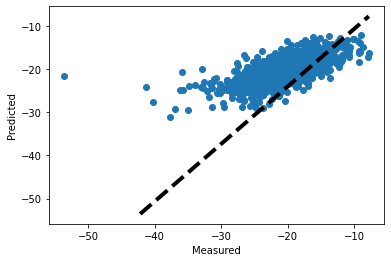

In [113]:
fig, ax = plt.subplots()
ax.scatter(my_test, y_pred)
ax.plot([y_test.min(), my_test.max()], [my_test.min(), my_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

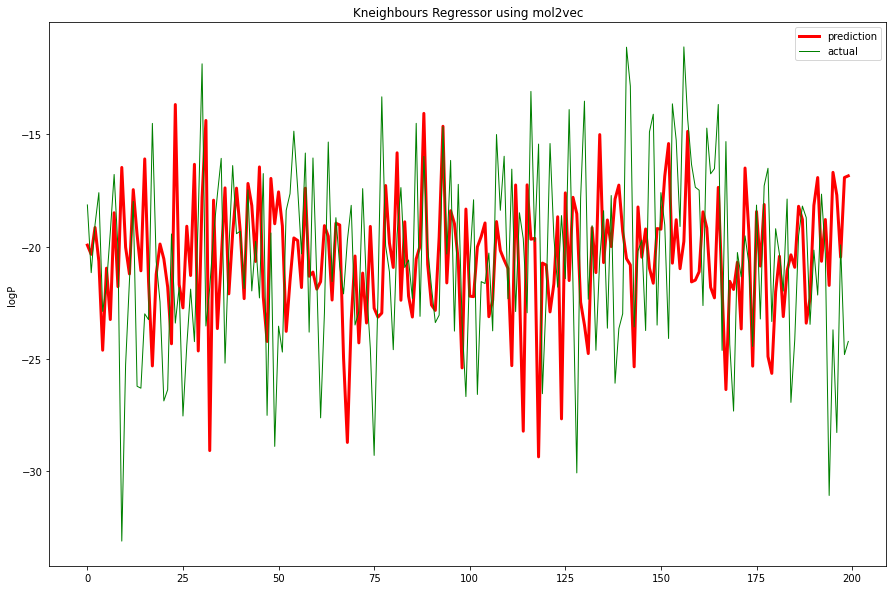

In [114]:
plt.figure(figsize=(15, 10))
plt.plot(y_pred[:200], "red", label="prediction", linewidth=3.0)
plt.plot(y_test[:200], 'green', label="actual", linewidth=1.0)
plt.legend()
plt.ylabel('logP')
plt.title("Kneighbours Regressor using mol2vec")
plt.show()

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
mclassifier = GradientBoostingRegressor(n_estimators =2000, max_depth = 30, min_samples_split= 10, learning_rate = 0.005, loss = 'ls')
mclassifier.fit(mx_train, my_train)
y_pred = mclassifier.predict(mx_test)
mse = mean_squared_error(my_test, y_pred)
rms = sqrt(mse)
print(mse)
print(rms)
mae = mean_absolute_error(my_test,y_pred)
print(mae)

8.143146160024415
2.8536198345302437
2.0325716267300473


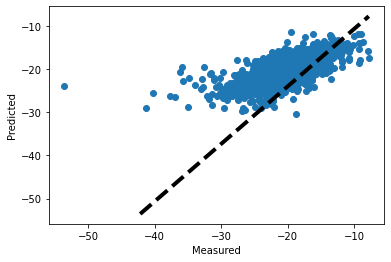

In [58]:
fig, ax = plt.subplots()
ax.scatter(my_test, y_pred)
ax.plot([y_test.min(), my_test.max()], [my_test.min(), my_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [115]:
svr = SVR(kernel='rbf',C=100,epsilon=1.5,gamma='scale')
svr.fit(mx_train, my_train)
y_pred = svr.predict(mx_test)
mse = mean_squared_error(my_test, y_pred)
rms = sqrt(mse)
print(rms)
mae = mean_absolute_error(my_test,y_pred)
print(mae)

2.371103408306654
1.6704595158708813


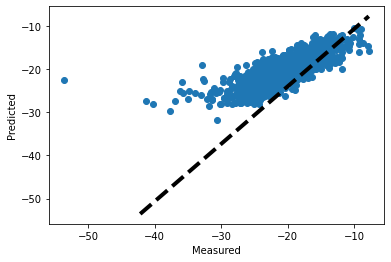

In [116]:
fig, ax = plt.subplots()
ax.scatter(my_test, y_pred)
ax.plot([y_test.min(), my_test.max()], [my_test.min(), my_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

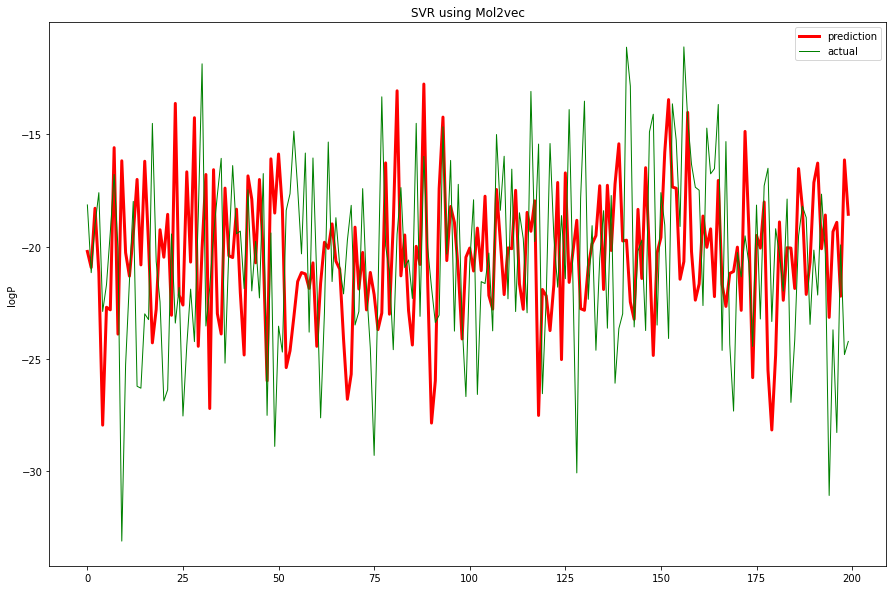

In [117]:
plt.figure(figsize=(15, 10))
plt.plot(y_pred[:200], "red", label="prediction", linewidth=3.0)
plt.plot(y_test[:200], 'green', label="actual", linewidth=1.0)
plt.legend()
plt.ylabel('logP')
plt.title("SVR using Mol2vec")
plt.show()

In [118]:
svr = SVR(kernel='poly',C=100,epsilon=1.5,gamma='scale')
svr.fit(mx_train, my_train)
y_pred = svr.predict(mx_test)
mse = mean_squared_error(my_test, y_pred)
rms = sqrt(mse)
print(rms)
mae = mean_absolute_error(my_test,y_pred)
print(mae)

2.430427449541101
1.7301253437800772


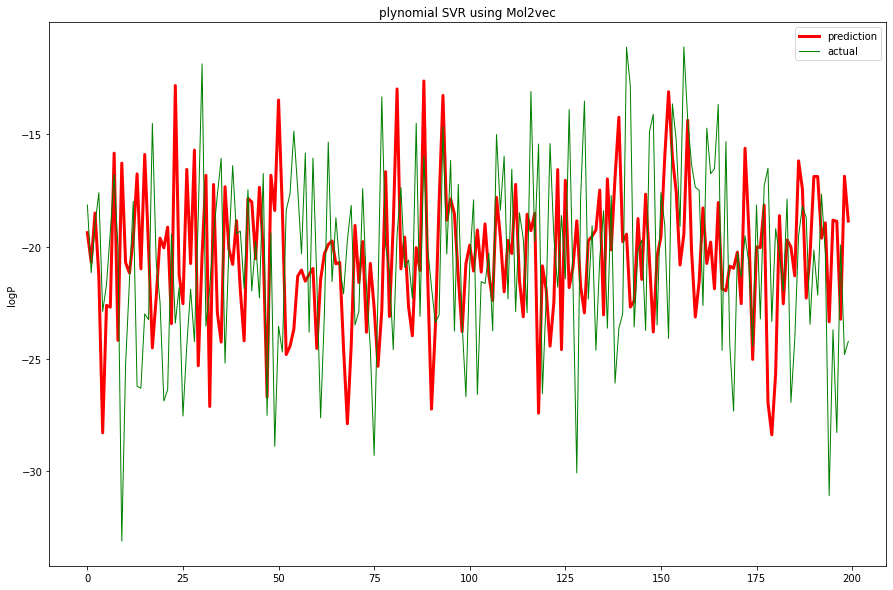

In [119]:
plt.figure(figsize=(15, 10))
plt.plot(y_pred[:200], "red", label="prediction", linewidth=3.0)
plt.plot(y_test[:200], 'green', label="actual", linewidth=1.0)
plt.legend()
plt.ylabel('logP')
plt.title("plynomial SVR using Mol2vec")
plt.show()

**Final**

In [0]:
fdf = pd.read_csv('/content/data/22bba507-efcf-4af0-b9d0-f26193605457_train.csv')
tdf = pd.read_csv('/content/data/3adc8d2b-4db8-4d95-a013-6a8dea863fb0_test.csv')

c_tdf = tdf.copy()
target = fdf['Binding Affinity']
fdf.drop(columns='Binding Affinity',inplace=True)
fdf['mol'] = fdf['SMILES sequence'].apply(lambda x: Chem.MolFromSmiles(x))
fdf['sentence'] = fdf.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)
fdf['mol2vec'] = [DfVec(x) for x in sentences2vec(fdf['sentence'], model, unseen='UNK')]
X = np.array([x.vec for x in fdf['mol2vec']])
y = target.values

tdf['mol'] = tdf['SMILES sequence'].apply(lambda x: Chem.MolFromSmiles(x))
tdf['sentence'] = tdf.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)
tdf['mol2vec'] = [DfVec(x) for x in sentences2vec(tdf['sentence'], model, unseen='UNK')]
x_t = np.array([x.vec for x in tdf['mol2vec']])

In [0]:
pca = PCA(n_components=255)
pX = pca.fit_transform(X)
px_t = pca.transform(x_t)

In [0]:
px_t.shape

(2500, 255)

In [0]:
xx_t = np.array(c_tdf)

In [0]:
from sklearn.linear_model import LinearRegression
freg = LinearRegression().fit(pX, y)
fy_pred = freg.predict(px_t)

In [0]:
import csv
filename="submission_pca_lr.csv"
fields = ['SMILES sequence', 'Binding Affinity']
rows = []
for i in range(len(fy_pred)):
  row = []
  row.append(xx_t[i][0])
  row.append(fy_pred[i])
  rows.append(row)
with open(filename, "w") as f:
  csvwriter = csv.writer(f)
  csvwriter.writerow(fields)
  csvwriter.writerows(rows)

Final **2**

In [0]:
fdf = pd.read_csv('/content/data/22bba507-efcf-4af0-b9d0-f26193605457_train.csv')
tdf = pd.read_csv('/content/data/3adc8d2b-4db8-4d95-a013-6a8dea863fb0_test.csv')

c_tdf = tdf.copy()
target = fdf['Binding Affinity']
fdf.drop(columns='Binding Affinity',inplace=True)
fdf['mol'] = fdf['SMILES sequence'].apply(lambda x: Chem.MolFromSmiles(x))
fdf['sentence'] = fdf.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)
fdf['mol2vec'] = [DfVec(x) for x in sentences2vec(fdf['sentence'], model, unseen='UNK')]
X = np.array([x.vec for x in fdf['mol2vec']])
y = target.values

tdf['mol'] = tdf['SMILES sequence'].apply(lambda x: Chem.MolFromSmiles(x))
tdf['sentence'] = tdf.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)
tdf['mol2vec'] = [DfVec(x) for x in sentences2vec(tdf['sentence'], model, unseen='UNK')]
x_t = np.array([x.vec for x in tdf['mol2vec']])

In [0]:
xx_t = np.array(c_tdf)

In [0]:
from sklearn.linear_model import LinearRegression
freg = LinearRegression().fit(X, y)
fy_pred = freg.predict(x_t)

In [0]:
import csv
filename="submission.csv"
fields = ['SMILES sequence', 'Binding Affinity']
rows = []
for i in range(len(fy_pred)):
  row = []
  row.append(xx_t[i][0])
  row.append(fy_pred[i])
  rows.append(row)
with open(filename, "w") as f:
  csvwriter = csv.writer(f)
  csvwriter.writerow(fields) 
  csvwriter.writerows(rows)

**Final 3**

In [0]:
fdf = pd.read_csv('/content/data/22bba507-efcf-4af0-b9d0-f26193605457_train.csv')
tdf = pd.read_csv('/content/data/3adc8d2b-4db8-4d95-a013-6a8dea863fb0_test.csv')

c_tdf = tdf.copy()
target = fdf['Binding Affinity']
fdf.drop(columns='Binding Affinity',inplace=True)
fdf['mol'] = fdf['SMILES sequence'].apply(lambda x: Chem.MolFromSmiles(x))
fdf['sentence'] = fdf.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)
fdf['mol2vec'] = [DfVec(x) for x in sentences2vec(fdf['sentence'], model, unseen='UNK')]
X = np.array([x.vec for x in fdf['mol2vec']])
y = target.values

tdf['mol'] = tdf['SMILES sequence'].apply(lambda x: Chem.MolFromSmiles(x))
tdf['sentence'] = tdf.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)
tdf['mol2vec'] = [DfVec(x) for x in sentences2vec(tdf['sentence'], model, unseen='UNK')]
x_t = np.array([x.vec for x in tdf['mol2vec']])

In [0]:
xx_t = np.array(c_tdf)

In [0]:
fsvr = SVR(C = 1.0, epsilon = 0.2).fit(X, y)
fy_pred = fsvr.predict(x_t)

In [0]:
import csv
filename="submission_final_3.csv"
fields = ['SMILES sequence', 'Binding Affinity']
rows = []
for i in range(len(fy_pred)):
  row = []
  row.append(xx_t[i][0])
  row.append(fy_pred[i])
  rows.append(row)
with open(filename, "w") as f:
  csvwriter = csv.writer(f)
  csvwriter.writerow(fields) 
  csvwriter.writerows(rows)

**Final 4**

In [0]:
fdf = pd.read_csv('/content/data/22bba507-efcf-4af0-b9d0-f26193605457_train.csv')
tdf = pd.read_csv('/content/data/3adc8d2b-4db8-4d95-a013-6a8dea863fb0_test.csv')

c_tdf = tdf.copy()
target = fdf['Binding Affinity']
fdf.drop(columns='Binding Affinity',inplace=True)
fdf['mol'] = fdf['SMILES sequence'].apply(lambda x: Chem.MolFromSmiles(x))
fdf['sentence'] = fdf.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)
fdf['mol2vec'] = [DfVec(x) for x in sentences2vec(fdf['sentence'], model, unseen='UNK')]
X = np.array([x.vec for x in fdf['mol2vec']])
y = target.values

tdf['mol'] = tdf['SMILES sequence'].apply(lambda x: Chem.MolFromSmiles(x))
tdf['sentence'] = tdf.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)
tdf['mol2vec'] = [DfVec(x) for x in sentences2vec(tdf['sentence'], model, unseen='UNK')]
x_t = np.array([x.vec for x in tdf['mol2vec']])

In [0]:
xx_t = np.array(c_tdf)

In [0]:
fsvr = SVR(kernel = 'rbf',C =50,gamma='scale')
fsvr.fit(X, y)
fy_pred = fsvr.predict(x_t)

In [0]:
import csv
filename="submission_final_4.csv"
fields = ['SMILES sequence', 'Binding Affinity']
rows = []
for i in range(len(fy_pred)):
  row = []
  row.append(xx_t[i][0])
  row.append(fy_pred[i])
  rows.append(row)
with open(filename, "w") as f:
  csvwriter = csv.writer(f)
  csvwriter.writerow(fields) 
  csvwriter.writerows(rows)

**Final 5**

In [0]:
fdf = pd.read_csv('/content/data/22bba507-efcf-4af0-b9d0-f26193605457_train.csv')
tdf = pd.read_csv('/content/data/3adc8d2b-4db8-4d95-a013-6a8dea863fb0_test.csv')

c_tdf = tdf.copy()
target = fdf['Binding Affinity']
fdf.drop(columns='Binding Affinity',inplace=True)
fdf['mol'] = fdf['SMILES sequence'].apply(lambda x: Chem.MolFromSmiles(x))
fdf['sentence'] = fdf.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)
fdf['mol2vec'] = [DfVec(x) for x in sentences2vec(fdf['sentence'], model, unseen='UNK')]
X = np.array([x.vec for x in fdf['mol2vec']])
y = target.values

tdf['mol'] = tdf['SMILES sequence'].apply(lambda x: Chem.MolFromSmiles(x))
tdf['sentence'] = tdf.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)
tdf['mol2vec'] = [DfVec(x) for x in sentences2vec(tdf['sentence'], model, unseen='UNK')]
x_t = np.array([x.vec for x in tdf['mol2vec']])

In [0]:
xx_t = np.array(c_tdf)

In [0]:
fsvr = SVR(kernel = 'rbf',C =100,epsilon=1.5,gamma='scale')
fsvr.fit(X, y)
fy_pred = fsvr.predict(x_t)

In [0]:
import csv
filename="submission_final_5.csv"
fields = ['SMILES sequence', 'Binding Affinity']
rows = []
for i in range(len(fy_pred)):
  row = []
  row.append(xx_t[i][0])
  row.append(fy_pred[i])
  rows.append(row)
with open(filename, "w") as f:
  csvwriter = csv.writer(f)
  csvwriter.writerow(fields) 
  csvwriter.writerows(rows)

**Covid 19**

In [0]:
import numpy as np
import pandas as pd
import os
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
from rdkit.Chem import Descriptors
from rdkit import DataStructs
from rdkit.Chem import MACCSkeys
from rdkit.Chem.AtomPairs import Pairs
from sklearn.model_selection import train_test_split
from rdkit.Chem import Descriptors
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.metrics import r2_score

from gensim.models import word2vec
from mol2vec.features import mol2alt_sentence, MolSentence, DfVec, sentences2vec
model = word2vec.Word2Vec.load('/content/300dm/model_300dim.pkl')

fdf = pd.read_csv('/content/data/22bba507-efcf-4af0-b9d0-f26193605457_train.csv')
tdf = pd.read_csv('/content/final_test_q3/4b566bb4-3155-49ff-91e1-19942504b20c_test.csv')

c_tdf = tdf.copy()
target = fdf['Binding Affinity']
fdf.drop(columns='Binding Affinity',inplace=True)
fdf['mol'] = fdf['SMILES sequence'].apply(lambda x: Chem.MolFromSmiles(x))
fdf['sentence'] = fdf.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)
fdf['mol2vec'] = [DfVec(x) for x in sentences2vec(fdf['sentence'], model, unseen='UNK')]
X = np.array([x.vec for x in fdf['mol2vec']])
y = target.values

tdf['mol'] = tdf['SMILES sequence'].apply(lambda x: Chem.MolFromSmiles(x))
tdf['sentence'] = tdf.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)
tdf['mol2vec'] = [DfVec(x) for x in sentences2vec(tdf['sentence'], model, unseen='UNK')]
x_t = np.array([x.vec for x in tdf['mol2vec']])

xx_t = np.array(c_tdf)

fsvr = SVR(kernel = 'rbf',C =100,epsilon=1.5,gamma='scale')
fsvr.fit(X, y)
fy_pred = fsvr.predict(x_t)

import csv
filename="submission.csv"
fields = ['SMILES sequence', 'Binding Affinity']
rows = []
for i in range(len(fy_pred)):
  row = []
  row.append(xx_t[i][0])
  row.append(fy_pred[i])
  rows.append(row)
with open(filename, "w") as f:
  csvwriter = csv.writer(f)
  csvwriter.writerow(fields) 
  csvwriter.writerows(rows)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
